# Projetinho (dps tu vê toin man)
projeto realizado visando estabelecer se o método de svd é eficaz na redução de dimensionalidade de um banco de dados (extended-yaleb)

In [2]:
import numpy as np
import numpy.linalg as npt
import matplotlib.pyplot as plt
from PIL import Image as img
import glob
import timeit
from sklearn.model_selection import train_test_split as division

# Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz Md com os dados das imagens de treino

In [3]:
start_time = timeit.default_timer()
imagens = np.asarray(glob.glob('*/*/*.pgm'))
imagens_treino, imagens_teste = division(imagens, test_size=0.2, random_state=5)
Md = img.open(imagens_treino[0])
Md = np.asarray(Md, dtype=np.float32)/255
Md = np.reshape(Md, (32256,1))
for i in range(1,imagens_treino.shape[0]):
    aux = img.open(imagens_treino[i])
    aux = np.asarray(aux, dtype=np.float32)/255
    aux = np.reshape(aux, (32256,1))
    Md = np.hstack((Md, aux))
print(Md.shape)
print(imagens_treino[0])
elapsed = timeit.default_timer() - start_time
print(f'Tempo de processamento: {elapsed:.2f}')

(32256, 1931)
CroppedYale\yaleB10\yaleB10_P00A-035E+40.pgm
Tempo de processamento: 102.43


# Centralizando os dados da nossa matriz de dados Md

In [9]:
Md = Md - np.mean(Md)

# Calculando a SVD de Md

In [10]:
start_time = timeit.default_timer()
u, k, vt = npt.svd(Md, full_matrices=False)
print(u.shape)
print(vt.shape)
elapsed = timeit.default_timer() - start_time
print(f'Tempo de processamento: {elapsed:.2f}')

(32256, 1931)
(1931, 1931)
Tempo de processamento:  54.07


# Mostrando as nossas 20 primeiras eigenfaces

Tempo de processamento:   0.83


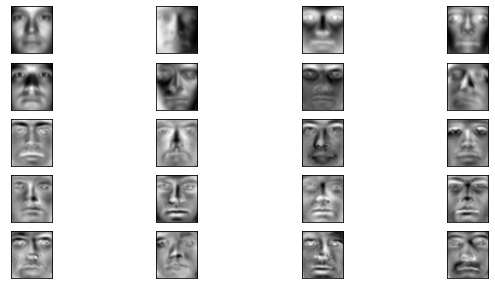

In [11]:
start_time = timeit.default_timer()
fig = plt.figure(figsize=(10,5))
for i in range(20):
    sub = fig.add_subplot(5, 4,i+1)
    sub.imshow(np.reshape(u.T[i,:], (192,168)), cmap='gray')
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_xticklabels([])
    sub.set_yticklabels([])
elapsed = timeit.default_timer() - start_time
print(f'Tempo de processamento: {elapsed:.2f}')

# Projetando as imagens de treino no "espaço" das eigenfaces
foi colocado as projeções em uma lista para o posterior acesso

In [12]:
r = 300 # quantidade de vetores singulares utilizados
imagenstreinoprojetadas = []

start_time = timeit.default_timer()
for pessoa in imagens_treino:
    imagem = img.open(pessoa)
    imagem = np.asarray(imagem, dtype=np.float32)/255
    imagem = np.reshape(imagem, (32256,1))
    projecao = u[:,0:r].T@imagem
    imagenstreinoprojetadas.append(projecao)
elapsed = timeit.default_timer() - start_time
print(f'Tempo de processamento: {elapsed:.2f}')

Tempo de processamento:  30.27


# Projetando as imagens de teste no "espaço" das eigenfaces
também foi colocada todas as projeções em uma lista para acessarmos posteriormente

In [13]:
imagenstesteprojetadas = []

start_time = timeit.default_timer()
for pessoa in imagens_teste:
    imagem = img.open(pessoa)
    imagem = np.asarray(imagem, dtype=np.float32)/255
    imagem = np.reshape(imagem, (32256,1))
    projecao = u[:,0:r].T@imagem
    imagenstesteprojetadas.append(projecao)
elapsed = timeit.default_timer() - start_time
print(f'Tempo de processamento: {elapsed:.2f}')

Tempo de processamento:   9.24


# O reconhecimento facial em si
estamos pegando as projeções de cada imagem de treino e de teste e tirando sua norma, a que tiver menor norma corresponde à imagem correta

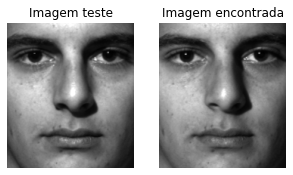

1


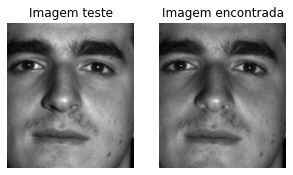

2


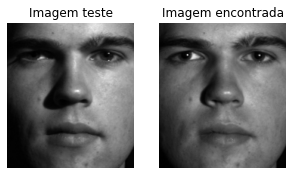

3


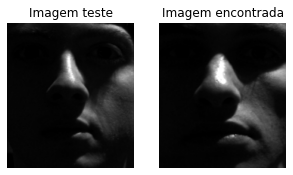

3


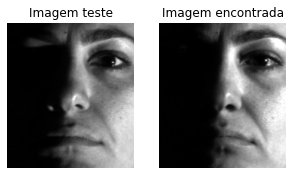

4


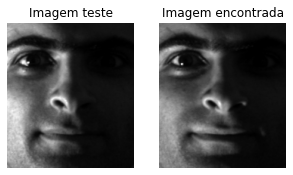

5


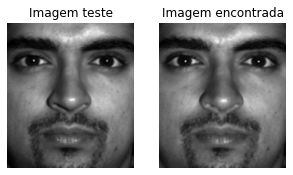

6


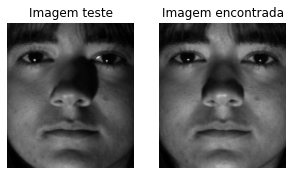

7


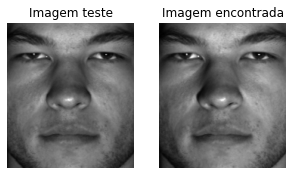

8


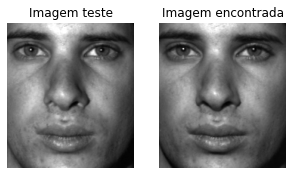

9


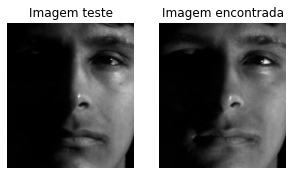

10


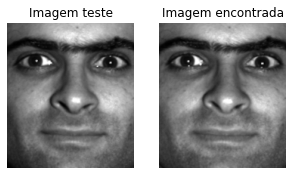

11


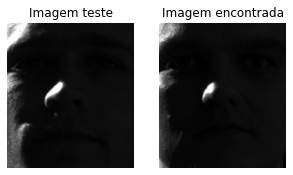

11


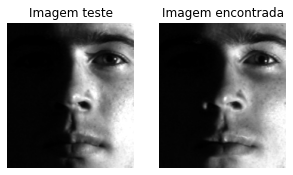

12


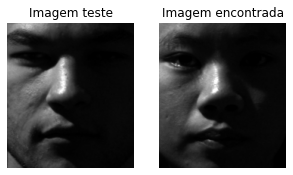

12


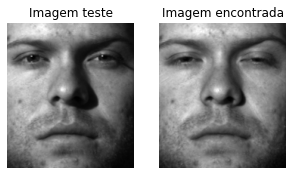

13


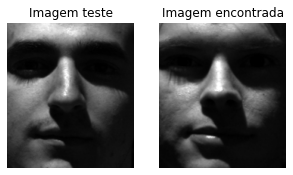

13


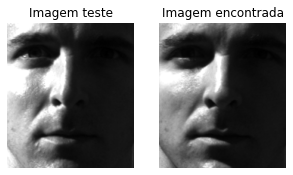

14


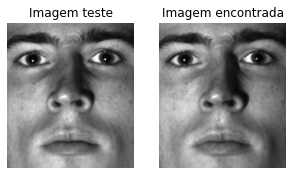

15


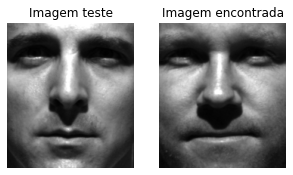

15


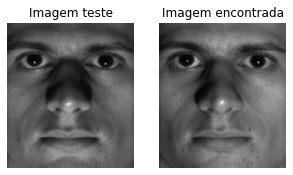

16


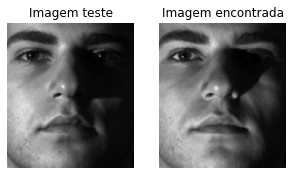

17


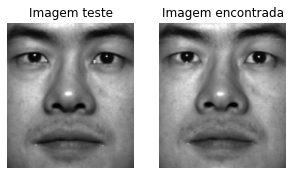

18


KeyboardInterrupt: 

In [15]:
acertos = 0
erros = 0
total = 0
start_time = timeit.default_timer()
for x, pessoa in enumerate(imagenstesteprojetadas):
    maior = 50000
    aux = -1
    for i, individuo in enumerate(imagenstreinoprojetadas):
        distancia = np.linalg.norm(pessoa-individuo)
        if distancia<maior:
            maior = distancia
            aux = i
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    dale = imagens_teste[x]
    plt.imshow(img.open(dale),cmap='gray')
    plt.title("Imagem teste")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.title("Imagem encontrada")
    dele = imagens_treino[aux]
    plt.imshow(img.open(dele),cmap='gray')
    plt.axis("off")
    plt.show()

    if(imagens_treino[aux][17:19] == imagens_teste[x][17:19]):
        acertos+=1
    else:
        erros += 1
elapsed = timeit.default_timer() - start_time
print('Tempo de processamento: {:6.2f}'.format(elapsed))
total = acertos + erros

In [1]:
print(acertos)
print(erros)
print(total)

NameError: name 'acertos' is not defined